In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import random
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [61]:
# Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [62]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
#city = "London"

# Build query URL
query_url = url + "units=" + units  + "&appid=" + api_key + "&q=" 
# set unit of measurement to imperial
#units = "imperial"


print(cities)

['guerrero negro', 'bose', 'hithadhoo', 'barentsburg', 'puerto ayora', 'ushuaia', 'sitio novo do tocantins', 'east london', 'haines junction', 'bluff', 'mujiayingzi', 'tanshui', 'chuy', 'maniitsoq', 'rikitea', 'barrow', 'muros', 'port alfred', 'atuona', 'inuvik', 'ola', 'powell river', 'pevek', 'westport', 'mataura', 'alice springs', 'narsaq', 'jamestown', 'vestmannaeyjar', 'taunggyi', 'khatanga', 'cherskiy', 'kungurtug', 'vila franca do campo', 'gobabis', 'morgan city', 'vicente guerrero', 'saldanha', 'mar del plata', 'gornozavodsk', 'vila praia de ancora', 'busselton', 'haridwar', 'atyashevo', 'novyy urengoy', 'laguna', 'quatre cocos', 'tasiilaq', 'olafsvik', 'berlevag', 'ossora', 'garmsar', 'cartagena', 'poshekhonye', 'sorland', 'hermanus', 'samalaeulu', 'santa cruz', 'dongsheng', 'kaduna', 'dikson', 'chokurdakh', 'paso de carrasco', 'deputatskiy', 'naze', 'yellowknife', 'ancud', 'hasaki', 'atbasar', 'sola', 'karratha', 'ponta do sol', 'vaini', 'tshikapa', 'saleaula', 'sao joao da b

In [63]:
response = requests.get(query_url + city)
json_pull = response.json()
json_pulls = json.dumps(json_pull, indent=4, separators=(". ", " = "), sort_keys = True)
print(json_pulls)


{
    "base" = "stations". 
    "clouds" = {
        "all" = 90
    }. 
    "cod" = 200. 
    "coord" = {
        "lat" = 62.46. 
        "lon" = -114.35
    }. 
    "dt" = 1608530661. 
    "id" = 6185377. 
    "main" = {
        "feels_like" = -24.32. 
        "humidity" = 75. 
        "pressure" = 1006. 
        "temp" = -14.8. 
        "temp_max" = -14.8. 
        "temp_min" = -14.8
    }. 
    "name" = "Yellowknife". 
    "sys" = {
        "country" = "CA". 
        "id" = 1007. 
        "sunrise" = 1608484005. 
        "sunset" = 1608501831. 
        "type" = 1
    }. 
    "timezone" = -25200. 
    "visibility" = 10000. 
    "weather" = [
        {
            "description" = "overcast clouds". 
            "icon" = "04n". 
            "id" = 804. 
            "main" = "Clouds"
        }
    ]. 
    "wind" = {
        "deg" = 50. 
        "speed" = 4.7
    }
}


In [64]:
city_data = []
city_List = []
country_List = []


city_count = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        city_count += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        country = jpull['sys']['country']
        searchCityID = jpull['id']
        city_data.append(jpull)
        city_List.append(city)
        country_List.append(country)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 603 for the city: guerrero negro
Record found for city: guerrero negro with city id: 4021858
Processing record 603 for the city: bose
Record found for city: bose with city id: 6457397
Processing record 603 for the city: hithadhoo
Record found for city: hithadhoo with city id: 1282256
Processing record 603 for the city: barentsburg
No weather record found for city: barentsburg
Processing record 603 for the city: puerto ayora
Record found for city: puerto ayora with city id: 3652764
Processing record 603 for the city: ushuaia
Record found for city: ushuaia with city id: 3833367
Processing record 603 for the city: sitio novo do tocantins
Record found for city: sitio novo do tocantins with city id: 3387423
Processing record 603 for the city: east london
Record found for city: east london with city id: 1006984
Processing record 603 for the city: haines junction
Record found for city: haines jun

Record found for city: south yuba city with city id: 5397851
Processing record 603 for the city: illoqqortoormiut
No weather record found for city: illoqqortoormiut
Processing record 603 for the city: lompoc
Record found for city: lompoc with city id: 5367788
Processing record 603 for the city: rio grande
Record found for city: rio grande with city id: 3451138
Processing record 603 for the city: pancas
Record found for city: pancas with city id: 3455277
Processing record 603 for the city: hobart
Record found for city: hobart with city id: 2163355
Processing record 603 for the city: eureka
Record found for city: eureka with city id: 5563397
Processing record 603 for the city: avarua
Record found for city: avarua with city id: 4035715
Processing record 603 for the city: ribeira grande
Record found for city: ribeira grande with city id: 3372707
Processing record 603 for the city: mashhad
Record found for city: mashhad with city id: 124665
Processing record 603 for the city: san cristobal


Record found for city: shenjiamen with city id: 1795632
Processing record 603 for the city: vao
Record found for city: vao with city id: 2137773
Processing record 603 for the city: daye
Record found for city: daye with city id: 1813206
Processing record 603 for the city: saint george
Record found for city: saint george with city id: 5546220
Processing record 603 for the city: znamenskoye
Record found for city: znamenskoye with city id: 1485020
Processing record 603 for the city: nishihara
Record found for city: nishihara with city id: 1855342
Processing record 603 for the city: nantucket
Record found for city: nantucket with city id: 4944903
Processing record 603 for the city: virginia beach
Record found for city: virginia beach with city id: 4791259
Processing record 603 for the city: arbagar
Record found for city: arbagar with city id: 2016708
Processing record 603 for the city: lebu
Record found for city: lebu with city id: 3883457
Processing record 603 for the city: bredasdorp
Reco

Record found for city: fremont with city id: 5350734
Processing record 603 for the city: college
Record found for city: college with city id: 5859699
Processing record 603 for the city: miri
Record found for city: miri with city id: 1738050
Processing record 603 for the city: cabo san lucas
Record found for city: cabo san lucas with city id: 3985710
Processing record 603 for the city: kihei
Record found for city: kihei with city id: 5849297
Processing record 603 for the city: kargopol
Record found for city: kargopol with city id: 552465
Processing record 603 for the city: ust-uda
Record found for city: ust-uda with city id: 2013865
Processing record 603 for the city: knysna
Record found for city: knysna with city id: 988698
Processing record 603 for the city: lichinga
Record found for city: lichinga with city id: 1043893
Processing record 603 for the city: nome
Record found for city: nome with city id: 5870133
Processing record 603 for the city: xadani
No weather record found for city:

Record found for city: kahului with city id: 5847411
Processing record 603 for the city: sorong
Record found for city: sorong with city id: 1626542
Processing record 603 for the city: solano
Record found for city: solano with city id: 5396987
Processing record 603 for the city: tsihombe
No weather record found for city: tsihombe
Processing record 603 for the city: pilot butte
Record found for city: pilot butte with city id: 6104745
Processing record 603 for the city: san pedro
Record found for city: san pedro with city id: 1688781
Processing record 603 for the city: poltavka
Record found for city: poltavka with city id: 1494500
Processing record 603 for the city: qingdao
Record found for city: qingdao with city id: 1797929
Processing record 603 for the city: alice town
Record found for city: alice town with city id: 3572924
Processing record 603 for the city: khonuu
No weather record found for city: khonuu
Processing record 603 for the city: kawana waters
No weather record found for ci

Record found for city: sokoni with city id: 149812
Processing record 603 for the city: loandjili
Record found for city: loandjili with city id: 2258378
Processing record 603 for the city: fortuna
Record found for city: fortuna with city id: 5563839
Processing record 603 for the city: victoria
Record found for city: victoria with city id: 1819729
Processing record 603 for the city: port macquarie
Record found for city: port macquarie with city id: 2152659
Processing record 603 for the city: zenzeli
Record found for city: zenzeli with city id: 463655
Processing record 603 for the city: jalu
Record found for city: jalu with city id: 86049
Processing record 603 for the city: bereda
Record found for city: bereda with city id: 3105522
Processing record 603 for the city: daxian
No weather record found for city: daxian
Processing record 603 for the city: huilong
Record found for city: huilong with city id: 1806840
Processing record 603 for the city: marion
Record found for city: marion with ci

Record found for city: qarqin with city id: 1129516
Processing record 603 for the city: aden
Record found for city: aden with city id: 415189
Processing record 603 for the city: pangody
Record found for city: pangody with city id: 1495626
Processing record 603 for the city: christchurch
Record found for city: christchurch with city id: 2192362
Processing record 603 for the city: aflu
No weather record found for city: aflu
Processing record 603 for the city: shimoda
Record found for city: shimoda with city id: 1852357
Processing record 603 for the city: ilheus
Record found for city: ilheus with city id: 3461408
Processing record 603 for the city: nara
Record found for city: nara with city id: 1855612
Processing record 603 for the city: tchibanga
Record found for city: tchibanga with city id: 2396253
Processing record 603 for the city: palabuhanratu
No weather record found for city: palabuhanratu
Processing record 603 for the city: petauke
Record found for city: petauke with city id: 899

Record found for city: teshie with city id: 2294665
Processing record 603 for the city: verkhnyaya inta
Record found for city: verkhnyaya inta with city id: 1487332
Processing record 603 for the city: tidore
No weather record found for city: tidore
Processing record 603 for the city: henties bay
Record found for city: henties bay with city id: 3356832
Processing record 603 for the city: havre-saint-pierre
Record found for city: havre-saint-pierre with city id: 5972291
Processing record 603 for the city: nemuro
Record found for city: nemuro with city id: 2128975
Processing record 603 for the city: ibra
Record found for city: ibra with city id: 287832
Processing record 603 for the city: assiniboia
Record found for city: assiniboia with city id: 5887798
Processing record 603 for the city: repnoye
Record found for city: repnoye with city id: 502124
Processing record 603 for the city: sciacca
Record found for city: sciacca with city id: 6542103
Processing record 603 for the city: haldibari


In [65]:
len(city_data)

580

In [66]:
#create variables for cities with full data
lat =  [data.get("coord").get("lat") for data in city_data]
long = [data.get("coord").get("lon") for data in city_data]
temp = [data.get("main").get("temp") for data in city_data]
humid = [data.get("main").get("humidity") for data in city_data]
cloud =[data.get("clouds").get("all") for data in city_data]
wind = [data.get("wind").get("speed") for data in city_data]

In [67]:
#Create data frame
weather_df = pd.DataFrame({
            "City ID":searchCityID,
            "City Name":city_List,
            "Country":country_List,
            "Latitude":lat,
            "Longitude":long,
            "Temp":temp,
            "Humidity":humid,
            "Clouds":cloud,
            "Winds":wind})
weather_df


,City ID,City Name,Country,Latitude,Longitude,Temp,Humidity,Clouds,Winds
0,3832899,guerrero negro,MX,27.98,-114.06,59.41,56,99,2.66
1,3832899,bose,IT,45.46,8.01,37.42,96,68,2.30
2,3832899,hithadhoo,MV,-0.60,73.08,82.04,76,71,11.03
3,3832899,puerto ayora,EC,-0.74,-90.35,71.01,95,63,5.23
4,3832899,ushuaia,AR,-54.80,-68.30,42.80,75,40,25.28
...,...,...,...,...,...,...,...,...,...
575,3832899,ningxiang,CN,37.34,111.21,27.97,76,0,5.55
576,3832899,bermeo,ES,43.42,-2.72,58.32,67,75,6.93
577,3832899,shirokovskiy,RU,58.84,57.78,7.00,79,100,3.00
578,3832899,roald,NO,62.58,6.13,44.37,70,20,5.82


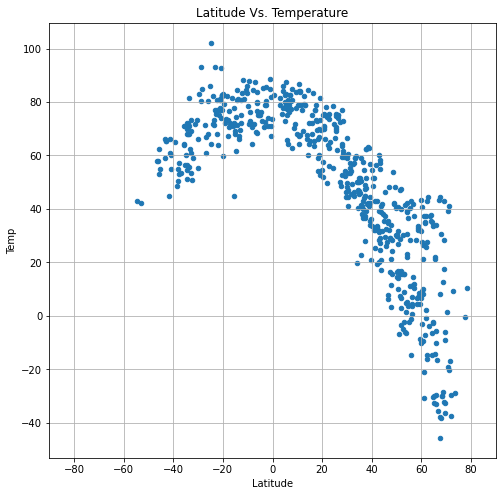

In [68]:
#Scatterplot for lat vs temp
weather_df.plot(kind="scatter", x="Latitude", y="Temp", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature", xlim= (-90,90))
plt.savefig("output_data/fig1.png")

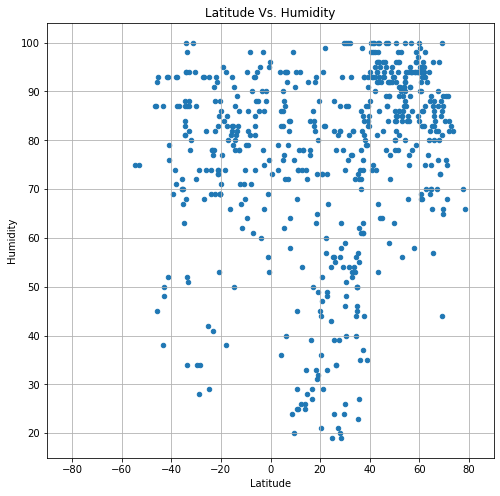

In [69]:
#Scatterplot for lat vs Humidity
weather_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity", xlim= (-90,90))
plt.savefig("output_data/fig2.png")

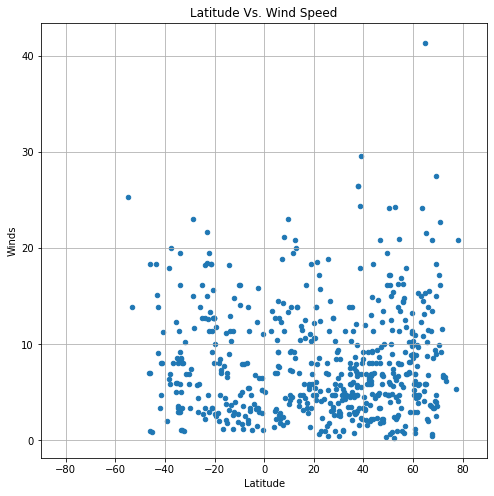

In [70]:
#Scatterplot for lat vs Winds
weather_df.plot(kind="scatter", x="Latitude", y="Winds", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed", xlim= (-90,90))
plt.savefig("output_data/fig3.png")

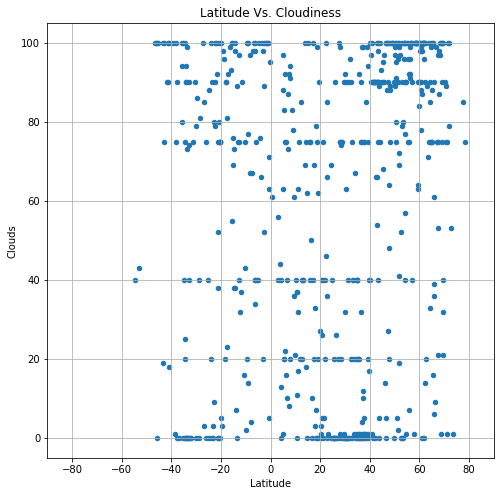

In [71]:
#Scatterplot for lat vs Cloudiness
weather_df.plot(kind="scatter", x="Latitude", y="Clouds", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness", xlim= (-90,90))
plt.savefig("output_data/fig4.png")

In [72]:
#Save dataframe as csv
pd.DataFrame.to_csv(weather_df, output_data_file)

weather_df.head()

,City ID,City Name,Country,Latitude,Longitude,Temp,Humidity,Clouds,Winds
0,3832899,guerrero negro,MX,27.98,-114.06,59.41,56,99,2.66
1,3832899,bose,IT,45.46,8.01,37.42,96,68,2.30
2,3832899,hithadhoo,MV,-0.60,73.08,82.04,76,71,11.03
3,3832899,puerto ayora,EC,-0.74,-90.35,71.01,95,63,5.23
4,3832899,ushuaia,AR,-54.80,-68.30,42.80,75,40,25.28


The correlation between Temp and Latitude is -0.85
The correlation between Clouds and Latitude is 0.37
The correlation between Humidity and Latitude is 0.41
The correlation between Winds and Latitude is 0.08


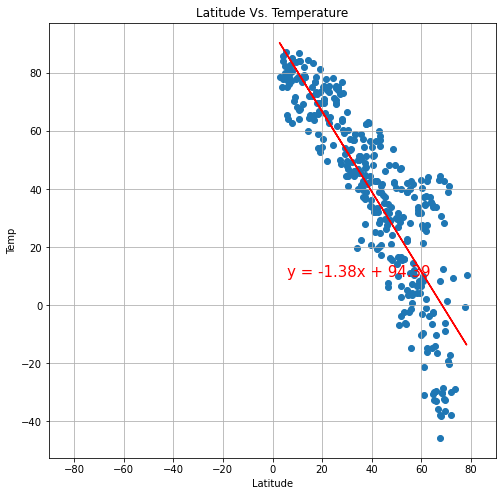

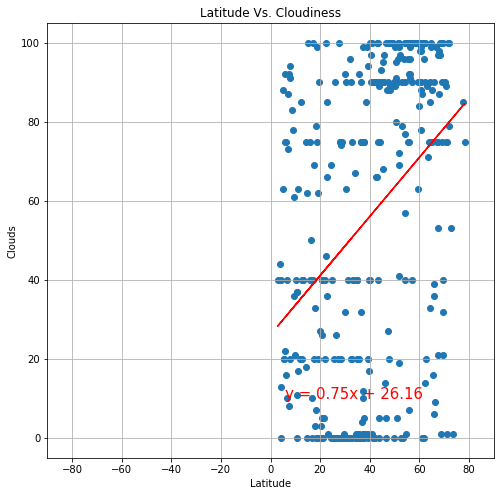

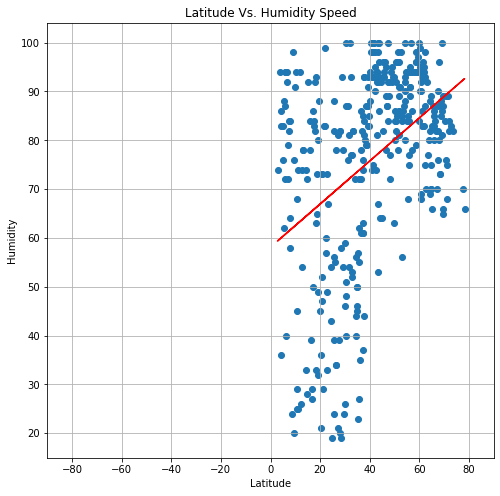

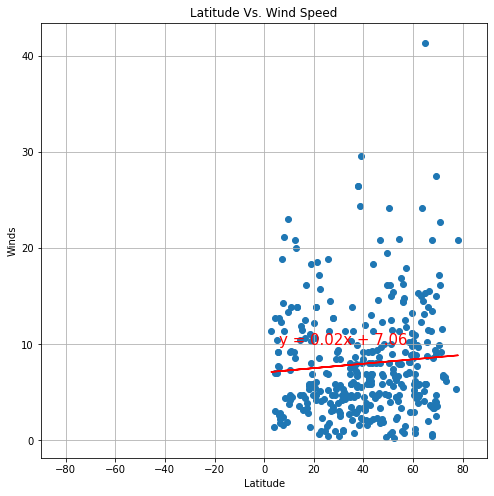

In [73]:
#Northern Hemisphere
#selected random 500 cities
df500 = weather_df.sample(n=500)

nothern_df = df500.loc[weather_df["Latitude"] >= 0.0]
nothern_df.reset_index(inplace=True)

#Scatterplot for lat vs temp
nothern_df.plot(kind="scatter", x="Latitude", y="Temp", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature", xlim= (-90,90))
#Calculate Linear regression
correlation1 = st.pearsonr(nothern_df["Latitude"],nothern_df["Temp"])
print(f"The correlation between Temp and Latitude is {round(correlation1[0],2)}")
# Add the linear regression equation and line to plot
x_values = nothern_df["Latitude"]
y_values = nothern_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig1_1.png")
#------------------------------------------------
#Scatterplot for lat vs Cloudiness
nothern_df.plot(kind="scatter", x="Latitude", y="Clouds", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness", xlim= (-90,90))
#Calculate Linear regression
correlation2 = st.pearsonr(nothern_df["Latitude"],nothern_df["Clouds"])
print(f"The correlation between Clouds and Latitude is {round(correlation2[0],2)}")
# Add the linear regression equation and line to plot
x2_values = nothern_df["Latitude"]
y2_values = nothern_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x2_values, y2_values)
regress2_values = x2_values * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2_values,y2_values)
plt.plot(x2_values,regress2_values,"r-")
plt.annotate(line_eq2,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig2_1.png")


#-------------------------------------------------
#Scatterplot for lat vs Humidity
nothern_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity Speed", xlim= (-90,90))
#Calculate Linear regression
correlation3 = st.pearsonr(nothern_df["Latitude"],nothern_df["Humidity"])
print(f"The correlation between Humidity and Latitude is {round(correlation3[0],2)}")
# Add the linear regression equation and line to plot
x3_values = nothern_df["Latitude"]
y3_values = nothern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x3_values, y3_values)
regress3_values = x3_values * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x3_values,y3_values)
plt.plot(x3_values,regress3_values,"r-")
plt.annotate(line_eq3,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig3_1.png")

#-------------------------------------------------------
#Scatterplot for lat vs Winds
nothern_df.plot(kind="scatter", x="Latitude", y="Winds", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed", xlim= (-90,90))
#Calculate Linear regression
correlation4 = st.pearsonr(nothern_df["Latitude"],nothern_df["Winds"])
print(f"The correlation between Winds and Latitude is {round(correlation4[0],2)}")
# Add the linear regression equation and line to plot
x4_values = nothern_df["Latitude"]
y4_values = nothern_df['Winds']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x4_values, y4_values)
regress4_values = x4_values * slope + intercept
line_eq4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x4_values,y4_values)
plt.plot(x4_values,regress4_values,"r-")
plt.annotate(line_eq4,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig4_1.png")


The correlation between Temp and Latitude is 0.56
The correlation between Clouds and Latitude is 0.08
The correlation between Humidity and Latitude is 0.11
The correlation between Winds and Latitude is -0.21


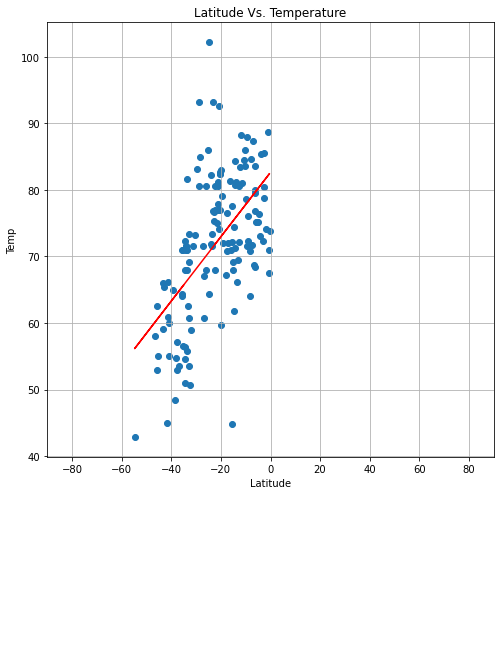

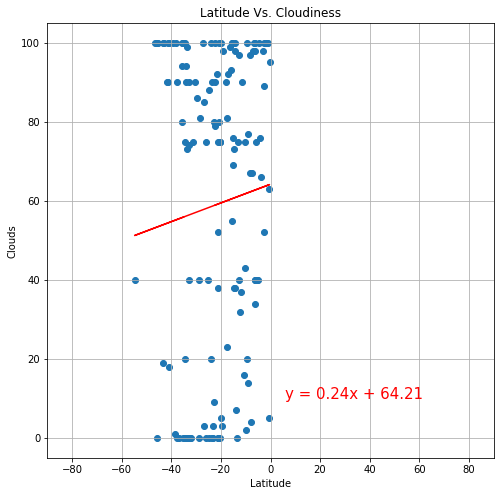

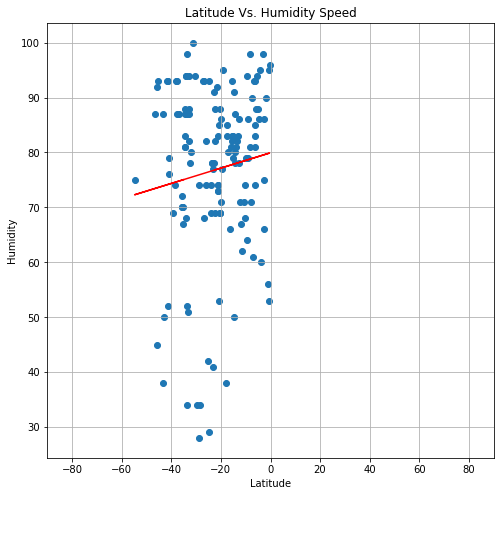

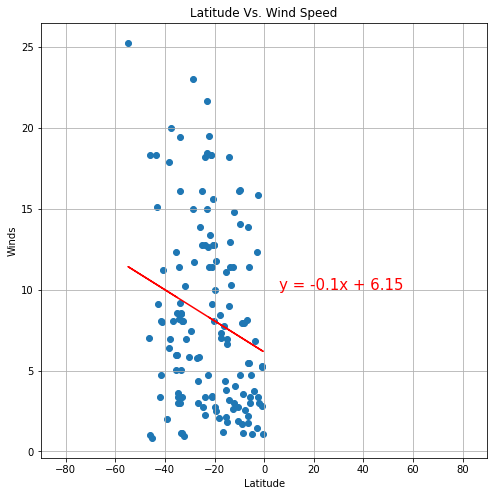

In [75]:
#Southern Hemisphere
southern_df = df500.loc[weather_df["Latitude"] < 0.0]
southern_df.reset_index(inplace=True)

#Scatterplot for lat vs temp
southern_df.plot(kind="scatter", x="Latitude", y="Temp", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature", xlim= (-90,90))
#Calculate Linear regression
correlation01 = st.pearsonr(southern_df["Latitude"],southern_df["Temp"])
print(f"The correlation between Temp and Latitude is {round(correlation01[0],2)}")
# Add the linear regression equation and line to plot
x0_values = southern_df["Latitude"]
y0_values = southern_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x0_values, y0_values)
regress0_values = x0_values * slope + intercept
line_eq0 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x0_values,y0_values)
plt.plot(x0_values,regress0_values,"r-")
plt.annotate(line_eq0,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig1_2.png")


#------------------------------------------------
#Scatterplot for lat vs Cloudiness
southern_df.plot(kind="scatter", x="Latitude", y="Clouds", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness", xlim= (-90,90))
#Calculate Linear regression
correlation02 = st.pearsonr(southern_df["Latitude"],southern_df["Clouds"])
print(f"The correlation between Clouds and Latitude is {round(correlation02[0],2)}")
# Add the linear regression equation and line to plot
x02_values = southern_df["Latitude"]
y02_values = southern_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x02_values, y02_values)
regress02_values = x02_values * slope + intercept
line_eq02 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x02_values,y02_values)
plt.plot(x02_values,regress02_values,"r-")
plt.annotate(line_eq02,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig2_2.png")


#-------------------------------------------------
#Scatterplot for lat vs Humidity
southern_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity Speed", xlim= (-90,90))
#Calculate Linear regression
correlation03 = st.pearsonr(southern_df["Latitude"],southern_df["Humidity"])
print(f"The correlation between Humidity and Latitude is {round(correlation03[0],2)}")
# Add the linear regression equation and line to plot
x03_values = southern_df["Latitude"]
y03_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x03_values, y03_values)
regress03_values = x03_values * slope + intercept
line_eq03 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x03_values,y03_values)
plt.plot(x03_values,regress03_values,"r-")
plt.annotate(line_eq03,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig3_2.png")


#-------------------------------------------------------
#Scatterplot for lat vs Winds
southern_df.plot(kind="scatter", x="Latitude", y="Winds", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed", xlim= (-90,90))
#Calculate Linear regression
correlation04 = st.pearsonr(southern_df["Latitude"],southern_df["Winds"])
print(f"The correlation between Winds and Latitude is {round(correlation04[0],2)}")
# Add the linear regression equation and line to plot
x04_values = southern_df["Latitude"]
y04_values = southern_df['Winds']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x04_values, y04_values)
regress04_values = x04_values * slope + intercept
line_eq04 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x04_values,y04_values)
plt.plot(x04_values,regress04_values,"r-")
plt.annotate(line_eq04,(6,10),fontsize=15,color="red")
plt.savefig("output_data/fig4_2.png")

